In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('../data/cardio_train.csv',sep=";")

In [4]:
# age: 1 - women, 2 - men
#cholesterol: (1: normal, 2: above normal, 3: well above normal)
#gluc: (1: normal, 2: above normal, 3: well above normal)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.isnull().values.any()

False

In [6]:
df['age'] = (df['age'] / 365).round().astype('int')

In [7]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


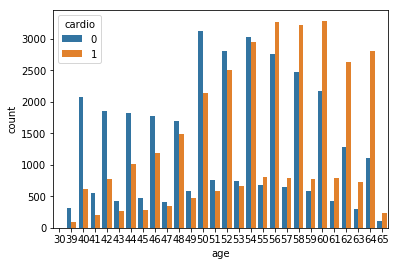

In [9]:
sns.countplot(x='age', hue='cardio', data = df)

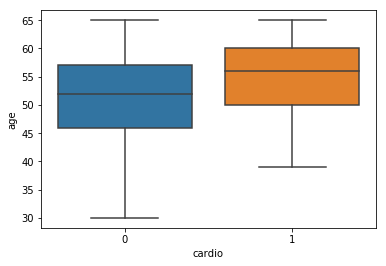

In [10]:
sns.boxplot(x='cardio',y='age',data=df)

In [11]:
cardio = df[df.cardio == 1]
noncardio = df[df.cardio == 0]

In [12]:
rcParams['figure.figsize'] = 11, 8

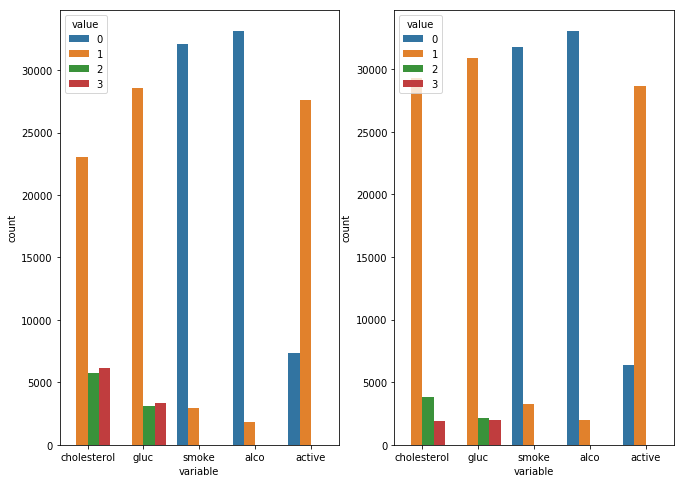

In [13]:
fig, ax =plt.subplots(1,2)
cardio_cate = cardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(cardio_cate),ax=ax[0])
noncardio_cate = noncardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(noncardio_cate),ax=ax[1])

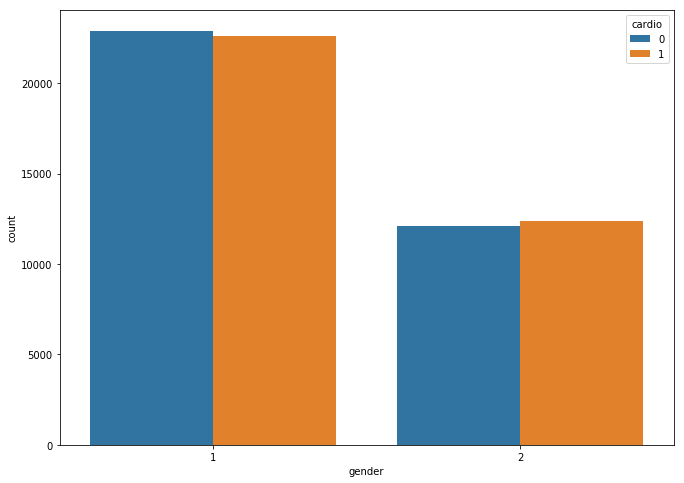

In [14]:
sns.countplot(x='gender', hue='cardio', data = df)

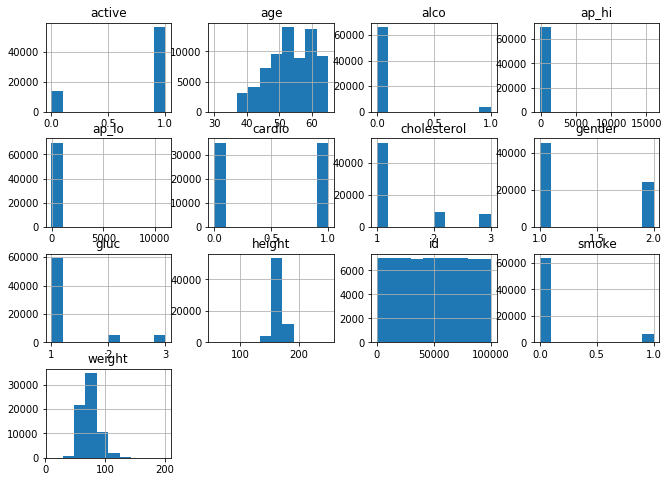

In [15]:
df.hist()
plt.show()

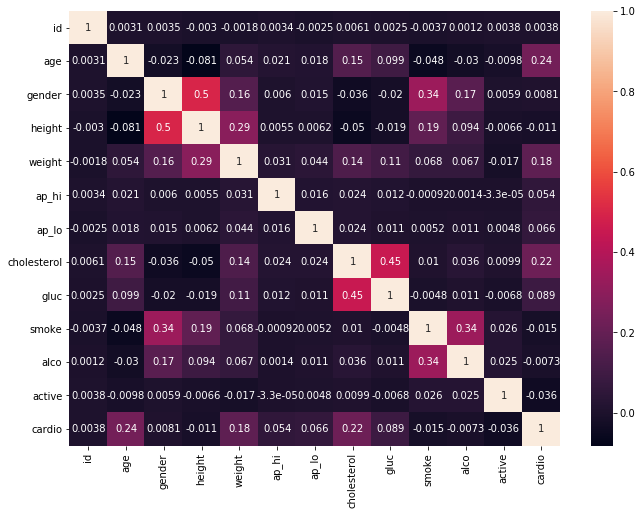

In [16]:
corr = df.corr()
f, ax = plt.subplots()
sns.heatmap(corr, annot=True, ax=ax)

In [17]:
cardio_corr = df.corr()['cardio'].drop('cardio').sort_values(ascending=False).abs()
cardio_corr

age            0.237749
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco           0.007330
height         0.010821
smoke          0.015486
active         0.035653
Name: cardio, dtype: float64

In [18]:
##logistic regression model

In [59]:
threshold = [0.002, 0.005, 0.01, 0.05, 0.1, 0.2]

In [60]:
for i in threshold:
    print(list(cardio_corr[cardio_corr > i].index))

['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'gender', 'id', 'alco', 'height', 'smoke', 'active']
['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'gender', 'alco', 'height', 'smoke', 'active']
['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'height', 'smoke', 'active']
['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi']
['age', 'cholesterol', 'weight']
['age', 'cholesterol']


In [61]:
model = LogisticRegression()

In [62]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [63]:
FPR_lst = []
TPR_lst = []
FDR_lst = []

for i in threshold:
    features = cardio_corr[cardio_corr > i].index
    model.fit(X_train[features],y_train)
    prediction = model.predict(X_test[features])
    
    TP_ = np.logical_and(prediction, y_test)
    FP_ = np.logical_and(prediction, np.logical_not(y_test))
    TN_ = np.logical_and(np.logical_not(prediction), np.logical_not(y_test))
    FN_ = np.logical_and(np.logical_not(prediction), y_test)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    FPR = FP/(FP+TN)
    FPR_lst.append(FPR)
    
    TPR = TP/(TP+FN)
    TPR_lst.append(TPR)

    FDR = FP/(FP+TP)
    FDR_lst.append(FDR)

    print(accuracy_score(prediction, y_test))

/Users/StefanChen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7097619047619048


/Users/StefanChen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7191428571428572


/Users/StefanChen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.719047619047619


/Users/StefanChen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7173333333333334
0.6373809523809524


/Users/StefanChen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/StefanChen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6217142857142857


In [64]:
FPR_lst, TPR_lst

([0.24420401854714066,
  0.22720247295208656,
  0.22720247295208656,
  0.22787867078825347,
  0.32351236476043277,
  0.3422527047913447],
 [0.665007513148009,
  0.6669797145003756,
  0.6667918858001503,
  0.6640683696468821,
  0.5993613824192336,
  0.5866829451540195])

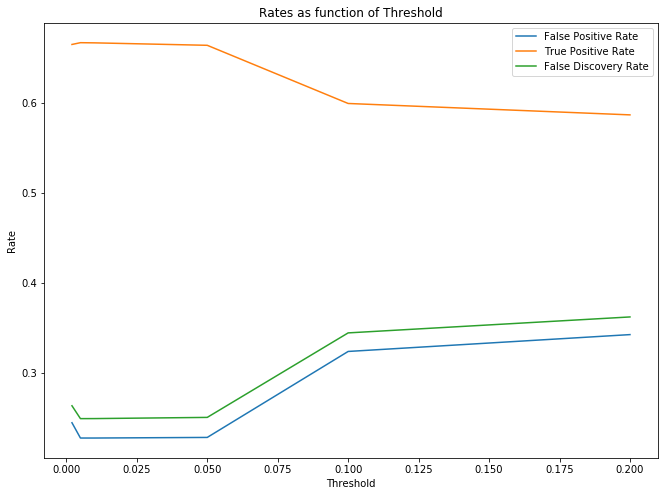

In [65]:
# line 1 points
x1 = threshold
y1 = FPR_lst
# plotting the line 1 points 
plt.plot(x1, y1, label = "False Positive Rate")


# line 2 points
x2 = threshold
y2 = TPR_lst
# plotting the line 2 points 
plt.plot(x2, y2, label = "True Positive Rate")

# line 3 points
x3 = threshold
y3 = FDR_lst
# plotting the line 2 points 
plt.plot(x3, y3, label = "False Discovery Rate")

plt.xlabel('Threshold')
# Set the y axis label of the current axis.
plt.ylabel('Rate')
# Set a title of the current axes.
plt.title('Rates as function of Threshold')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()